<a href="https://colab.research.google.com/github/Supakornnn/data_viz_2022/blob/main/SVEIQCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# เตรียมโค้ดคำนวณ

In [1]:
#import libralies
import pandas as pd # ใช้จัดการข้อมูลต่าง ๆ ที่เป็นตาราง พวกexcel ,CSV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # พล็อตกราฟต่างๆ 

from scipy.integrate import odeint #Integrate a system of ordinary differential equations.
                                                # func(y, t0, ...) 

%config InlineBackend.figure_format = 'retina'

#SVEIQCR simulation of Monkeypox in human

## พารามิเตอร์ของตัวแบบ และสมการเชิงอนุพันธ์

In [2]:
def deriv (y, t,Nh,Lambda, Phi, Mu, Nu, theta, Beta, delta, alpha, Tau, Rho, gamma,beta2,beta3 ): # paramerter ในตัวแบบ โดย t คือ เวลา N จำนวนประชากรมนุษย์ทั้งหมด
    S, V, E, I, Q, C, R = y
    
    dSdt = (Lambda*Nh)+Phi*Q-Mu*S-(beta2*0.002252929+beta3*0.000000060078)*S-Nu*S
    dVdt = Nu*S-Mu*V
    dEdt =((beta2*0.002252929)+(beta3*0.000000060078))*S-Mu*E-theta*E-Beta*E
    dIdt = theta*E-delta*I-Mu*I-Rho*I-gamma*I
    dQdt = Beta*E-delta*Q-Mu*Q-Phi*Q-Tau*Q
    dCdt = gamma*I-delta*C-Mu*C-alpha*C
    dRdt =Rho*I+Tau*Q+alpha*C-Mu*R

    return dSdt, dVdt, dEdt, dIdt, dQdt, dCdt, dRdt

In [4]:
def deriv (y, t,Nh,Lambda, Phi, Mu, Nu, theta, Beta, delta, alpha, Tau, Rho, gamma,beta2,beta3 ): # paramerter ในตัวแบบ โดย t คือ เวลา N จำนวนประชากรมนุษย์ทั้งหมด
    Sbar, Vbar, Ebar, Ibar, Qbar, Cbar, Rbar = y
    
    dSbardt = (Lambda*Nh)+Phi*Qbar-Mu*Sbar-(beta2*0.002252929+beta3*0.000000060078)*Sbar-Nu*Sbar
    dVbardt = Nu*Sbar-Mu*Vbar
    dEbardt =((beta2*0.002252929)+(beta3*0.000000060078))*Sbar-Mu*Ebar-theta*Ebar-Beta*Ebar
    dIbardt = theta*Ebar-delta*Ibar-Mu*Ibar-Rho*Ibar-gamma*Ibar
    dQbardt = Beta*Ebar-delta*Qbar-Mu*Qbar-Phi*Qbar-Tau*Qbar
    dCbardt = gamma*Ibar-delta*Cbar-Mu*Cbar-alpha*Cbar
    dRbardt =Rho*Ibar+Tau*Qbar+alpha*Cbar-Mu*Rbar

    return  dSbardt,  dVbardt,  dEbardt,  dIbardt,  dQbardt,  dCbardt,  dRbardt

In [5]:
S0 = 332863180
V0 = 15000
E0 = 10000
I0 = 20
Q0 = 8000
C0 = 1000
R0 = 2800
Nh = S0+V0+E0+I0+Q0+C0+R0

In [6]:
Nh

332900000

In [8]:
#Initial number 
Sbar = 332863180
Vbar = 15000
Ebar = 10000
Ibar = 20
Qbar = 8000
Cbar = 1000
Rbar = 2800

Sbar,Vbar,Ebar,Ibar,Qbar,Cbar,Rbar >0

# Time period 
t = np.arange(0,283,1)

# parameter value
Lambda =0.0049352388
Phi = 0.0010167589
Mu =0.0095245783
#Lamda = 0.003
Nu = 0.0052393877
theta =0.0019997222
Beta = 0.0091629333
delta = 0.005359517
alpha = 0.0050207332
Tau = 0.0091332018
Rho = 0.0092280078
gamma = 0.0052555345

#Beta1 = 0.0027
beta2 =0.00001
beta3 = 0.0049061873

# Constant rate 
L = 0.0049352388
P = 0.0010167589
M= 0.0095245783              
#LD = 0.003
V = 0.0052393877
T = 0.0019997222             
B =0.0091629333
D =0.005359517                      
A =0.0050207332
J = 0.0091332018
R = 0.0092280078                
G = 0.0052555345               

#B1 = 0.0027
B2 = 0.00001
B3 = 0.0049061873

#Integration SVEIQCR model
result = odeint(deriv, (Sbar, Vbar, Ebar, Ibar, Qbar, Cbar,Rbar), t, args = (Nh,L,P, M,V,T,B,D,A,J,R,G,B2,B3))

#Summary
simulationResult = pd.DataFrame(result, columns = ['Susceptible','Vaccine','Exposed', 'Infectious','Quarantine','Clinically','Recovered' ])
simulationResult = simulationResult.astype(np.int32)

In [26]:
simulationResult 

['Exposed']

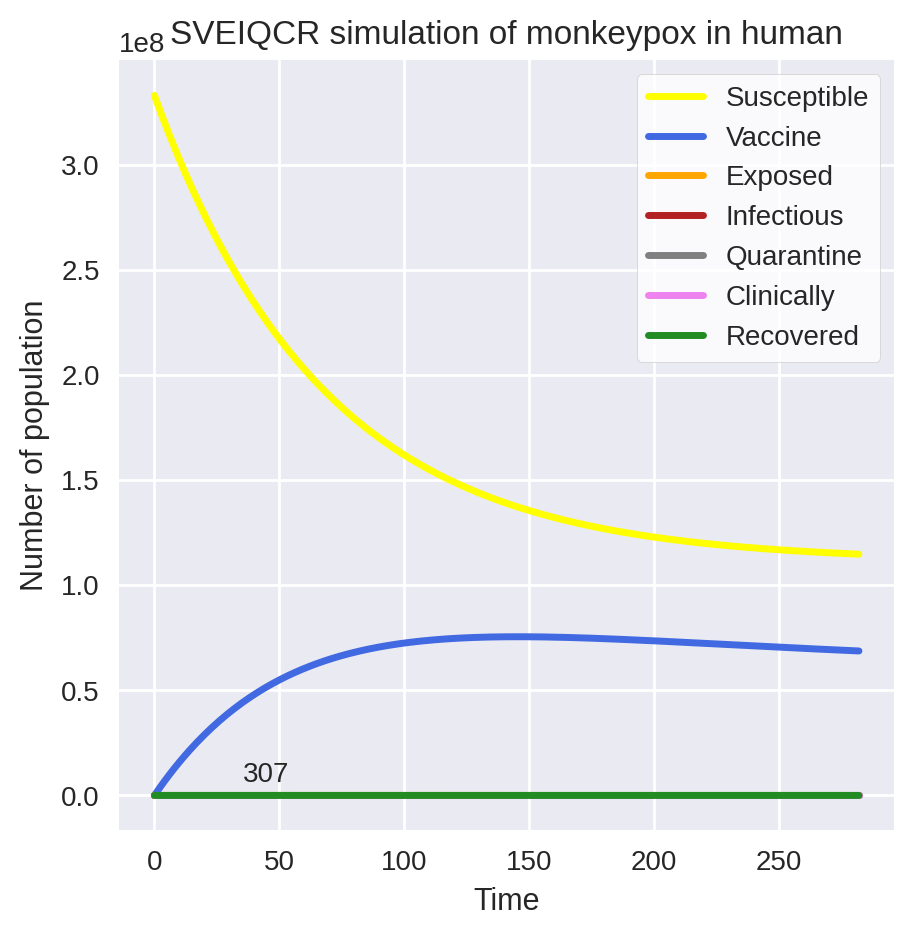

In [ ]:
# plot the simulation
plt.figure (figsize = (5, 5)) #กำหนดขนาด
with plt.style.context('seaborn'): # พล็อตเนื้อหา สไตล์ต่าง ๆ
    plt.title('SVEIQCR simulation of monkeypox in human') # ชื่อกราฟ
    plt.xlabel('Time') # แกน X
    plt.ylabel('Number of population') # แกน Y
    plt.plot(simulationResult['Susceptible'], c = 'yellow', linewidth = 2.5,label = 'Susceptible') 
    plt.plot(simulationResult['Vaccine'], c = 'royalblue', linewidth = 2.5,label = 'Vaccine') 
    plt.plot(simulationResult['Exposed'], c = 'orange', linewidth = 2.5, label = 'Exposed') 
    plt.plot(simulationResult['Infectious'], c = 'firebrick', linewidth = 2.5,label = 'Infectious') 
    plt.plot(simulationResult['Quarantine'], c = 'gray', linewidth = 2.5,label = 'Quarantine') 
    plt.plot(simulationResult['Clinically'], c = 'violet',linewidth = 2.5,label = 'Clinically') 
    plt.plot(simulationResult['Recovered'], c = 'forestgreen', linewidth = 2.5,label = 'Recovered') 
    plt.annotate(simulationResult['Infectious'].max(),
                    (simulationResult['Infectious'].idxmax(), simulationResult['Infectious'].max()),
                    textcoords = 'offset points', xytext = (5,5),ha = 'center')
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()

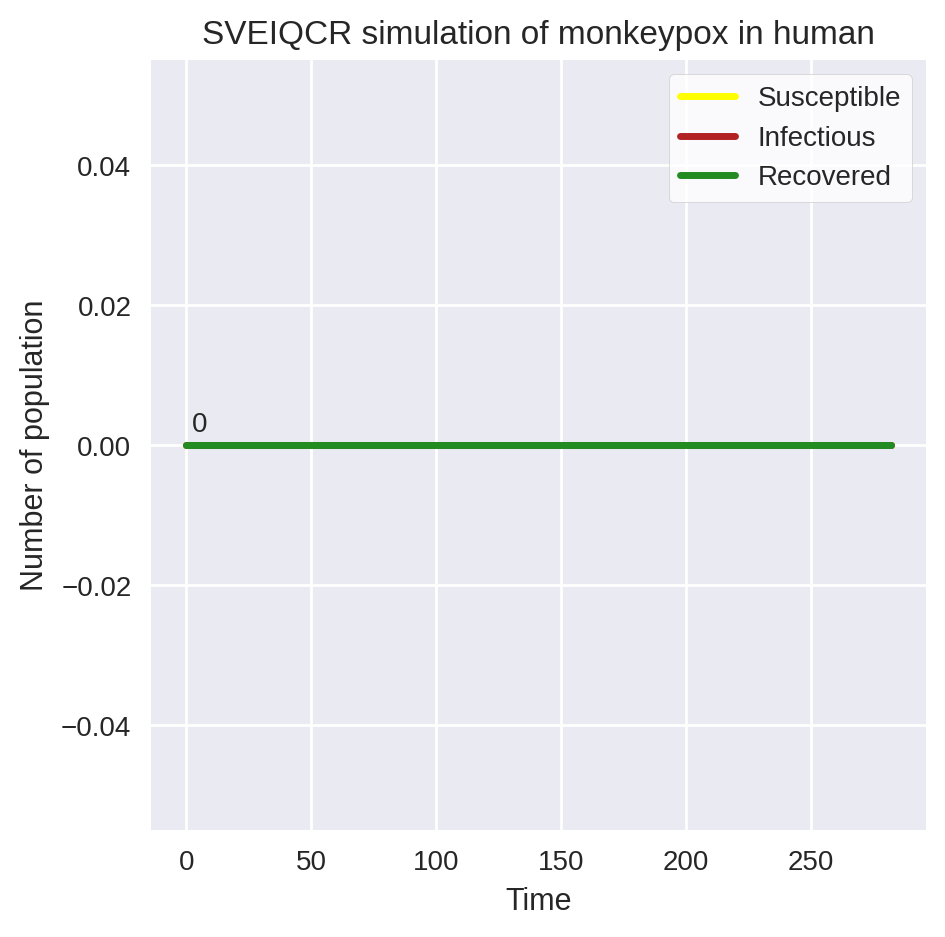

In [ ]:
# plot the simulation
plt.figure (figsize = (5, 5)) #กำหนดขนาด
with plt.style.context('seaborn'): # พล็อตเนื้อหา สไตล์ต่าง ๆ
    plt.title('SVEIQCR simulation of monkeypox in human') # ชื่อกราฟ
    plt.xlabel('Time') # แกน X
    plt.ylabel('Number of population') # แกน Y
    plt.plot(simulationResult['Susceptible'], c = 'yellow', linewidth = 2.5,label = 'Susceptible') 
    plt.plot(simulationResult['Infectious'], c = 'firebrick', linewidth = 2.5,label = 'Infectious') 
    plt.plot(simulationResult['Recovered'], c = 'forestgreen', linewidth = 2.5,label = 'Recovered') 
    plt.annotate(simulationResult['Infectious'].max(),
                    (simulationResult['Infectious'].idxmax(), simulationResult['Infectious'].max()),
                    textcoords = 'offset points', xytext = (5,5),ha = 'center')
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()

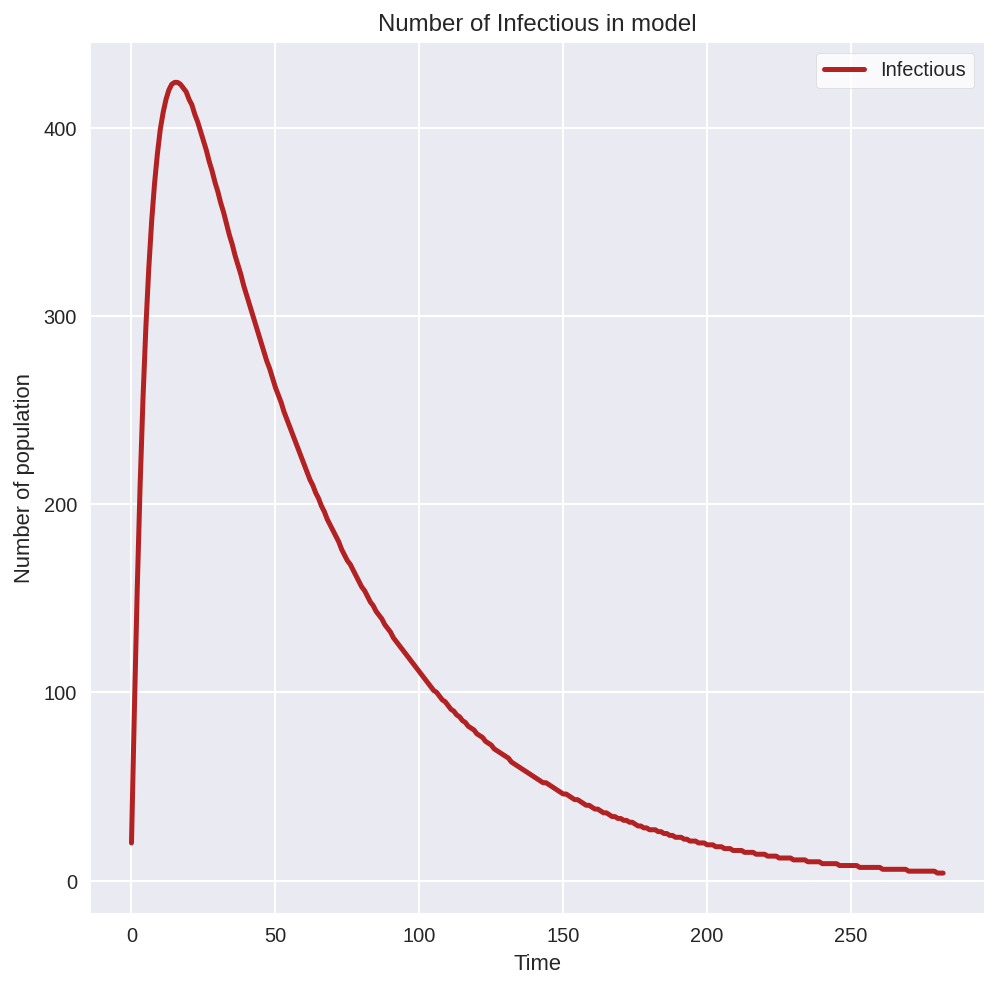

In [ ]:
plt.figure (figsize = (8, 8))
with plt.style.context('seaborn'):
    plt.title('Number of Infectious in model') 
    plt.xlabel('Time')
    plt.ylabel('Number of population')
    plt.plot(simulationResult['Infectious'], c = 'firebrick', linewidth = 2.5,label = 'Infectious') 
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()

In [ ]:
data_pred = simulationResult[['Infectious']]
data_pred

,Infectious
0,20
1,98
2,175
3,241
4,298
...,...
278,21
279,21
280,21
281,21


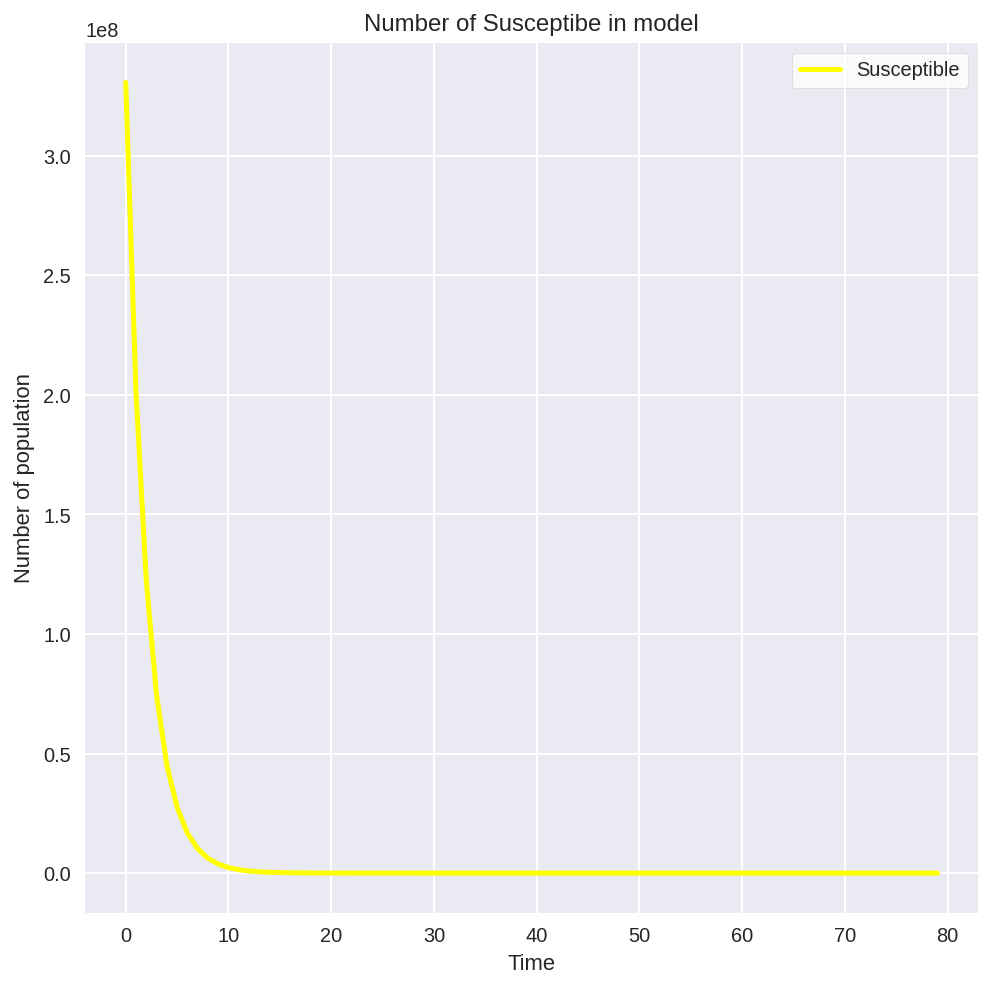

In [ ]:
plt.figure (figsize = (8, 8))
with plt.style.context('seaborn'):
    plt.title('Number of Susceptibe in model') 
    plt.xlabel('Time')
    plt.ylabel('Number of population')
    plt.plot(simulationResult['Susceptible'], c = 'yellow', linewidth = 2.5,label = 'Susceptible') 
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()

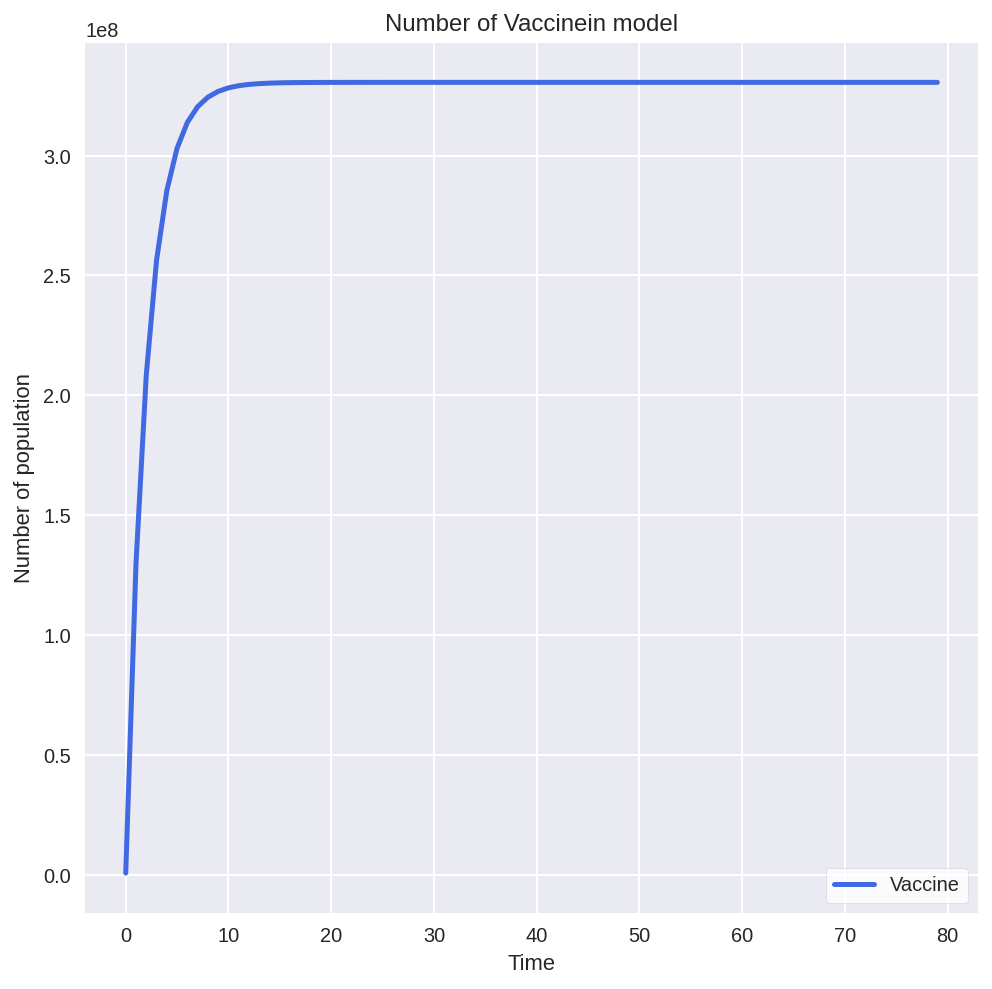

In [ ]:
plt.figure (figsize = (8, 8))
with plt.style.context('seaborn'):
    plt.title('Number of Vaccinein model') 
    plt.xlabel('Time')
    plt.ylabel('Number of population')
    plt.plot(simulationResult['Vaccine'], c = 'royalblue', linewidth = 2.5,label = 'Vaccine') 
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()

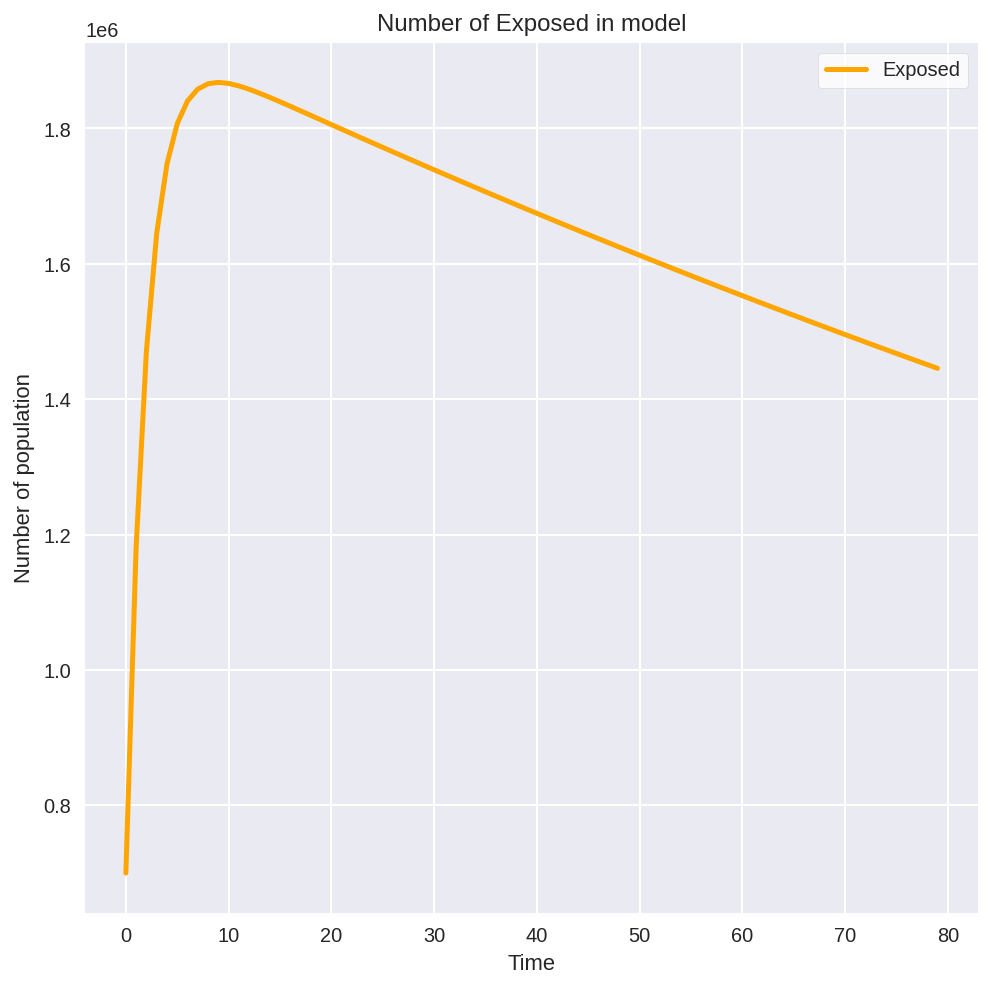

In [ ]:
plt.figure (figsize = (8, 8))
with plt.style.context('seaborn'):
    plt.title('Number of Exposed in model') 
    plt.xlabel('Time')
    plt.ylabel('Number of population')
    plt.plot(simulationResult['Exposed'], c = 'orange', linewidth = 2.5, label = 'Exposed') 
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()

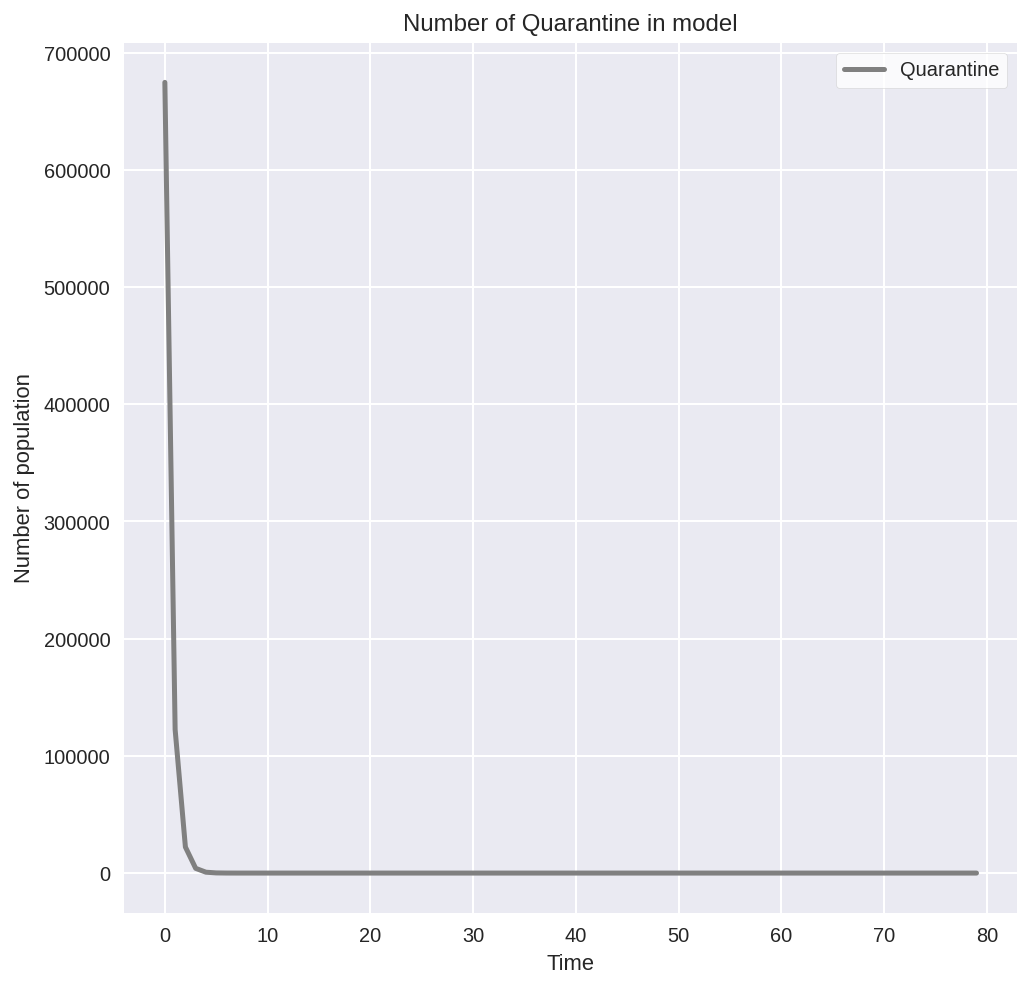

In [ ]:
plt.figure (figsize = (8, 8))
with plt.style.context('seaborn'):
    plt.title('Number of Quarantine in model') 
    plt.xlabel('Time')
    plt.ylabel('Number of population')
    plt.plot(simulationResult['Quarantine'], c = 'gray', linewidth = 2.5,label = 'Quarantine')
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()

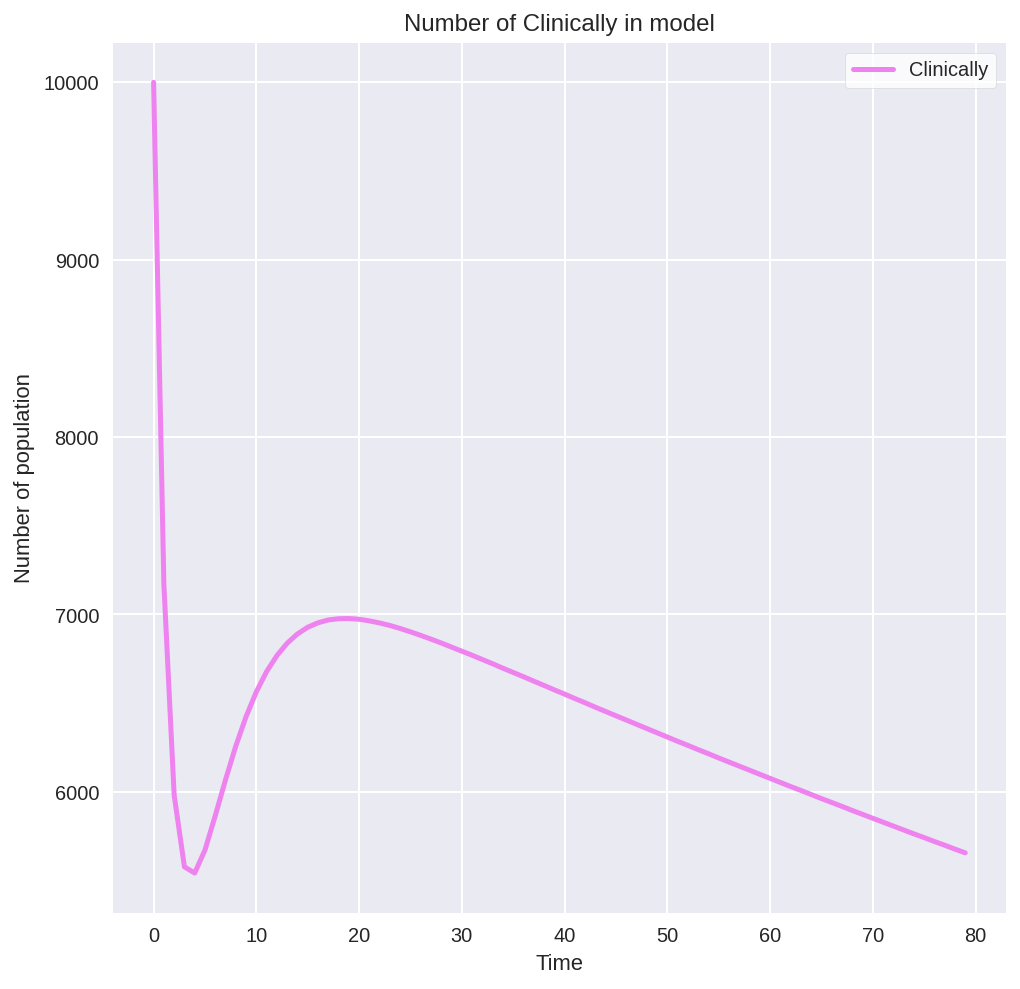

In [ ]:
plt.figure (figsize = (8, 8))
with plt.style.context('seaborn'):
    plt.title('Number of Clinically in model') 
    plt.xlabel('Time')
    plt.ylabel('Number of population')
    plt.plot(simulationResult['Clinically'], c = 'violet',linewidth = 2.5,label = 'Clinically') 
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()

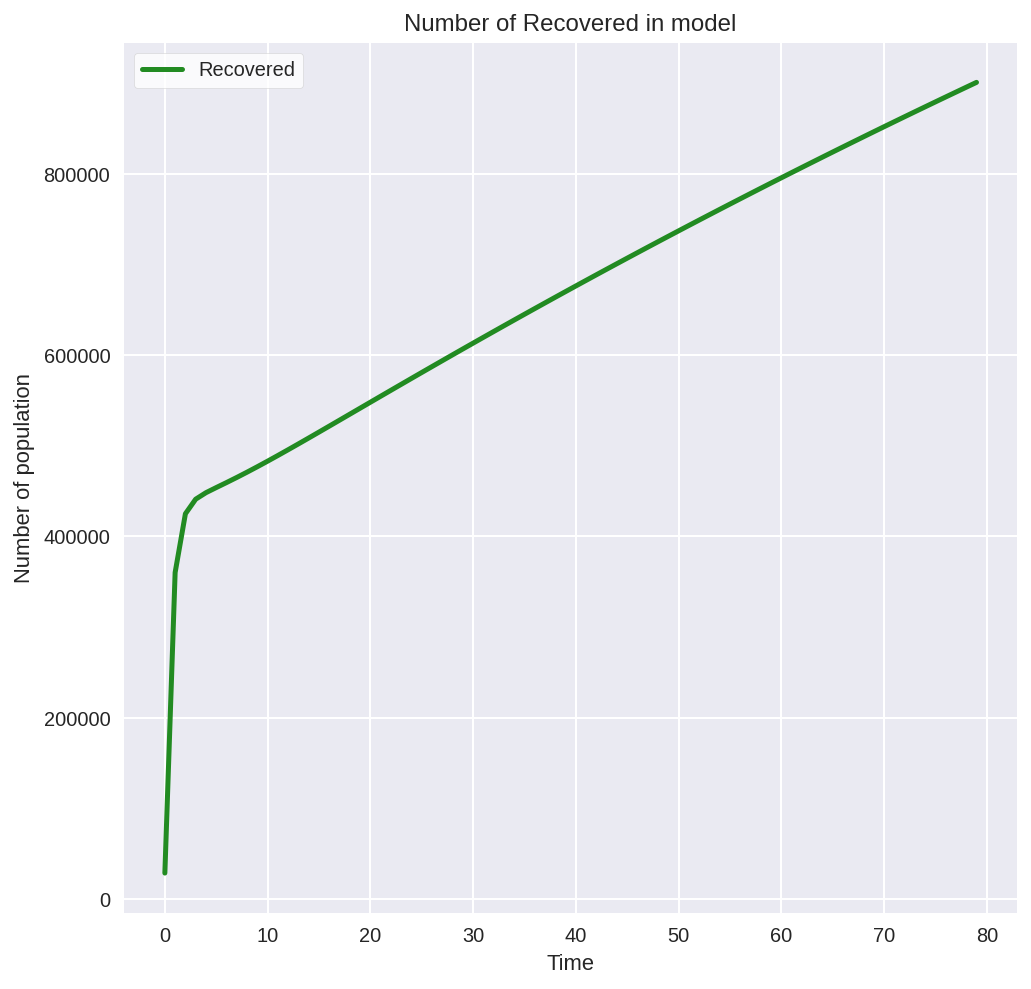

In [ ]:
plt.figure (figsize = (8, 8))
with plt.style.context('seaborn'):
    plt.title('Number of Recovered in model') 
    plt.xlabel('Time')
    plt.ylabel('Number of population')
    plt.plot(simulationResult['Recovered'], c = 'forestgreen', linewidth = 2.5,label = 'Recovered') 
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()

# SEI simulation of Monkeypox in rodent

## พารามิเตอร์ของตัวแบบ และสมการเชิงอนุพันธ์

In [ ]:
# SEI model ในประชากรสัตว์ฟันแทะ
# Differential equations
def deriv(y, t,Nr, Lambdar, Mur, Lamdar, thetar, deltar): # 
    S, E, I = y
    dSdt = Lambdar-Mur*S-Lamdar*S
    dEdt = Lamdar*S-Mur*E-thetar*E
    dIdt = thetar*E -deltar*I-Mur*I
    return dSdt, dEdt, dIdt

In [ ]:
#Initial number 
Sr = 250
Er = 125
Ir = 75
Nr = Sr+Er+Ir

# Time period (80 days)
t = np.arange(0,80,1)

# parameter value
Lambdar = 0.2
Mur = 0.1
Lamdar = 0
thetar = 0.032
deltar = 0.5

# Constant rate 
Lr = 0.2  
Mr = 0.1 
LDr= 0
Tr = 0.032  
dr= 0.5

#Integration SEI model
result_r = odeint(deriv, (Sr, Er, Ir), t, args = (Nr,Lr, Mr, LDr, Tr, dr))

#Summary
simulationResult_r = pd.DataFrame(result_r, columns = ['Susceptible', 'Exposed', 'Infectious', ])
simulationResult_r = simulationResult_r.astype(np.int32)

In [ ]:
simulationResult_r

,Susceptible,Exposed,Infectious
0,250,125,75
1,226,109,43
2,205,95,26
3,185,84,16
4,168,73,11
...,...,...,...
75,2,0,0
76,2,0,0
77,2,0,0
78,2,0,0


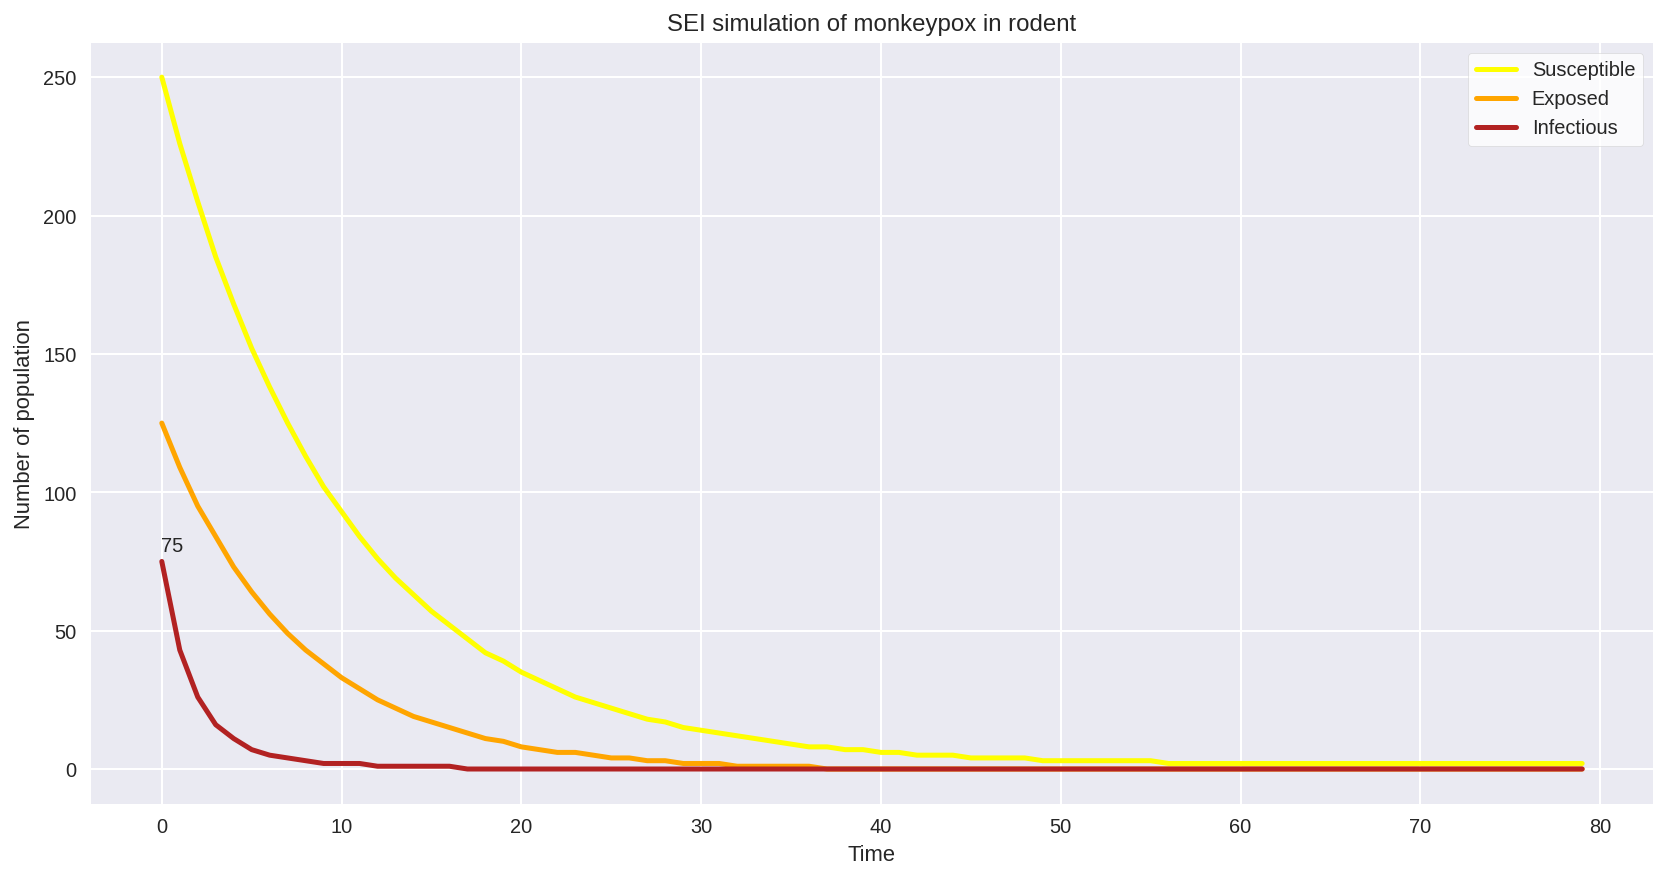

In [ ]:
# plot the simulation
plt.figure (figsize = (14, 7)) #กำหนดขนาด
with plt.style.context('seaborn'): # พล็อตเนื้อหา สไตล์ต่าง ๆ
    plt.title('SEI simulation of monkeypox in rodent') # ชื่อกราฟ
    plt.xlabel('Time') # แกน X
    plt.ylabel('Number of population') # แกน Y
    plt.plot(simulationResult_r['Susceptible'], c = 'yellow', linewidth = 2.5,label = 'Susceptible') 
    plt.plot(simulationResult_r['Exposed'], c = 'orange',linewidth = 2.5,label = 'Exposed') 
    plt.plot(simulationResult_r['Infectious'], c = 'firebrick', linewidth = 2.5,label = 'Infectious') 
    plt.annotate(simulationResult_r['Infectious'].max(),
                    (simulationResult_r['Infectious'].idxmax(), simulationResult_r['Infectious'].max()),
                    textcoords = 'offset points', xytext = (5,5),ha = 'center')
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()

In [ ]:
print(model.ssr) # residual sum of squares

1002044317.5205696
